**br_stat_profiler - Help Text**

In [1]:

import os

from user_args import load_parser, check_args
from br_stat_profiler import preprocess_recal_table, profile_rt, save_profile

cmd = f"--help"

parser = load_parser()
args = parser.parse_args(cmd.split())
adict = check_args(args) 
# [print(key,":",val) for key,val in adict.items()] 

rt2_pre_stat_df = preprocess_recal_table(adict)
profile = profile_rt(rt2_pre_stat_df, adict)
save_profile(profile, adict)

profile

ImportError: cannot import name 'preprocess_recal_table' from 'br_stat_profiler' (/home/ido/br_stat_profiler/br_stat_profiler.py)

**br_stat_profiling**<br>
Setting: qerr_cutoff  is turned off, 2 wobble_positions

In [2]:

import os

from user_args import load_parser, check_args, UARGS
from br_stat_profiler import preprocess_GATK_report, profile_rt

RECAL_TABLE_DIR = "./data/test_bqsr/"
REC_TAB_FULL_PATH = \
    RECAL_TABLE_DIR + "pre-LUAD-02_all_chrs_wo_Y_MT.bam.context4.recal_data.table"
OUTFILE_DIR = "./outfiles/"
OUTFILE = OUTFILE_DIR + "first_profile_num.csv"

if os.path.exists(OUTFILE):
    os.remove(OUTFILE)

# cmd = f"--infile {REC_TAB_FULL_PATH} -o {OUTFILE} -co -20"
# cmd = f"--infile {REC_TAB_FULL_PATH} -o {OUTFILE} -nW"
# cmd = f"--infile {REC_TAB_FULL_PATH} -o {OUTFILE} --qerr_cutoff -20 "
cmd = f"--infile {REC_TAB_FULL_PATH} -o {OUTFILE} --qerr_cutoff -20 --min_score 20 --scr_bin_count 3 --zscore"
# cmd = f"--infile {REC_TAB_FULL_PATH} -o {OUTFILE} --qerr_cutoff 3 --qerr_cutoff_both_sides"
# cmd = f"--infile {REC_TAB_FULL_PATH} -o {OUTFILE} --qerr_cutoff -20 --keep_nan_value"

parser = load_parser()
args = parser.parse_args(cmd.split())
adict = check_args(args) 
# [print(key,":",val) for key,val in adict.items()] 

rt2_pre_stat_df = preprocess_GATK_report(adict)
profile = profile_rt(rt2_pre_stat_df, adict)
# save_profile(profile, adict)
with adict[UARGS.OUTFILE] as f:
    profile.to_csv(f)
        

profile

version : 1.0
infile : <_io.TextIOWrapper name='./data/test_bqsr/pre-LUAD-02_all_chrs_wo_Y_MT.bam.context4.recal_data.table' mode='r' encoding='UTF-8'>
outfile : <_io.TextIOWrapper name='./outfiles/first_profile_num.csv' mode='x' encoding='UTF-8'>
log_file : <ipykernel.iostream.OutStream object at 0x7feaef37bbb0>
min_score : 20
max_score : 100
min_err_observed : 100
scr_bin_count : 3
cyc_bin_count : 10
min_cyc : 1
max_cyc : 150
nan_rep : None
qerr_cutoff_both_sides : False
zscore : True
cov_type : cntxt
qerr_cutoff : -20.0
no_wobble : False
max_wob_N_occ : 2
max_wob_R_Y_occ : 3
no_log : False
extract_read_group : False
> Harvesting Arguments, 17 rows
> Harvesting Quantized, 94 rows
> Harvesting RecalTable0, 1 rows
> Harvesting RecalTable1, 28 rows
> Harvesting RecalTable2, 13940 rows
    row 5000 (35.9%)
    row 10000 (71.7%)
\--------------- Harvest Finished ----------------/


,HVWKMCCXY
AAAA:0:Context,-2.567365
AAAA:1:Context,-1.579431
AAAA:2:Context,0.929890
AAAC:0:Context,-1.754496
AAAC:1:Context,-1.405709
...,...
YYYN:1:Context,-0.501707
YYYN:2:Context,1.014974
YYYT:0:Context,-2.059624
YYYT:1:Context,-0.649757


#### **Step 1:** Binning Quality Scores into 4 bins (default value of scr_bin_count argument)

In [3]:
rt2_pre_stat_df

,ReadGroup,QualityScore,CovariateValue,CovariateName,EventType,EmpiricalQuality,Observations,Errors,RG_ScoreBin
0,HVWKMCCXY,20,-10,Cycle,M,19.0,1290119,14706.0,0
1,HVWKMCCXY,20,-100,Cycle,M,20.0,751925,6827.0,0
2,HVWKMCCXY,20,-101,Cycle,M,21.0,1189935,10320.0,0
3,HVWKMCCXY,20,-102,Cycle,M,21.0,1203828,10311.0,0
4,HVWKMCCXY,20,-103,Cycle,M,20.0,1318912,12306.0,0
...,...,...,...,...,...,...,...,...,...
6744,HVWKMCCXY,32,TTAA,Context,M,41.0,171284812,12580.0,2
6745,HVWKMCCXY,32,TTAG,Context,M,37.0,97670908,18943.0,2
6746,HVWKMCCXY,32,TTCT,Context,M,39.0,203890620,26064.0,2
6747,HVWKMCCXY,32,TTTA,Context,M,38.0,206776269,32371.0,2


#### **Step 2:** 
1) Calculating the Qerror (Empyrical Quality - Machine Quality) 
2) Calculating the Qerror of context with wobble positions
3) Completing the missing values as None or zero

In [4]:
from br_stat_profiler import prepare_stat_df
from constants import RC_TAB2
cntxt_rt2_stat_df = prepare_stat_df(rt2_pre_stat_df, RC_TAB2.CNTXT_COV, adict)
cntxt_rt2_stat_df

,ReadGroup,RG_ScoreBin,Context,BinAvgQltyPval,BinAvgQltyScore,BinSumObs,BinSumObsErrs,BinAvgEmpQlty,BinAvgQltyErr,ID
0,HVWKMCCXY,0,AAAA,0.006329,21.986767,21215042,228540.0,19.676817,-2.309950,AAAA:0:Context
1,HVWKMCCXY,1,AAAA,0.001931,27.141079,91147969,174157.0,27.188061,0.046981,AAAA:1:Context
2,HVWKMCCXY,2,AAAA,0.000737,31.322692,1005503262,184826.0,37.356204,6.033512,AAAA:2:Context
3,HVWKMCCXY,0,AAAC,0.007411,21.301336,12618193,101843.0,20.930660,-0.370676,AAAC:0:Context
4,HVWKMCCXY,1,AAAC,0.001907,27.195499,35253663,60466.0,27.656930,0.461431,AAAC:1:Context
...,...,...,...,...,...,...,...,...,...,...
7075,HVWKMCCXY,1,YYYN,0.001960,27.077761,1393486174,1494562.0,29.695887,2.618127,YYYN:1:Context
7076,HVWKMCCXY,2,YYYN,0.000868,30.616359,10070594526,2078592.0,36.852859,6.236499,YYYN:2:Context
7077,HVWKMCCXY,0,YYYT,0.005470,22.619937,109083423,768471.0,21.521313,-1.098624,YYYT:0:Context
7078,HVWKMCCXY,1,YYYT,0.001794,27.461272,416936231,444069.0,29.726192,2.264920,YYYT:1:Context


#### QErrors Distribution

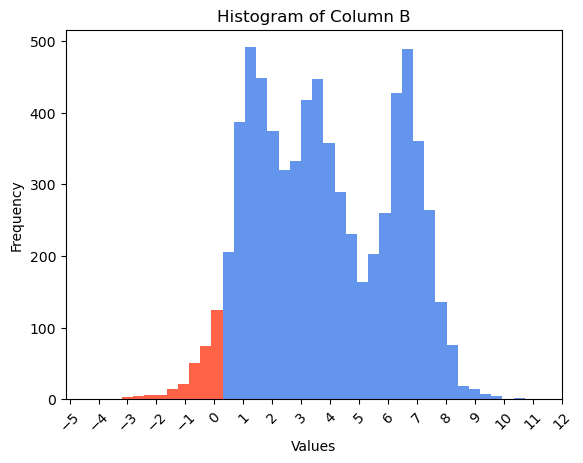

In [5]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from constants import RT2_STAT
# Assuming you have a dataframe called 'df' with columns 'A', 'B', and 'C'
cutoff = 3
bins_count = 40
stat_df = cntxt_rt2_stat_df
data = stat_df[RT2_STAT.BIN_AVG_QLTY_ERR_COL]

# Plotting the histogram
counts, bins, patches = plt.hist(data, bins=bins_count)  # Adjust the number of bins as needed

for i in range(len(bins)-1):
    if bins[i] <= 0:
        patches[i].set_facecolor('tomato')
    else:
        patches[i].set_facecolor('cornflowerblue')

# plt.axvline(x=cutoff, color='black', linestyle='--',linewidth=1.5)
# plt.axvline(x=-cutoff, color='black', linestyle='--')

# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Column B')

minx = math.floor(stat_df[RT2_STAT.BIN_AVG_QLTY_ERR_COL].min())
maxx =  math.ceil(stat_df[RT2_STAT.BIN_AVG_QLTY_ERR_COL].max())
xticks = np.arange(minx, maxx+1, 1)

plt.xticks(xticks, rotation=45)
# Display the histogram
plt.show()


#### QErrors Distribution - negative over positive values 

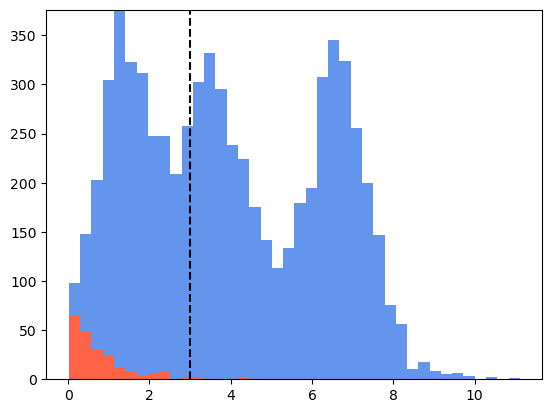

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from constants import RT2_STAT
# Assuming you have a dataframe called 'df' with columns 'A', 'B', and 'C'
cutoff = 3
bins_count = 80
data = cntxt_rt2_stat_df[RT2_STAT.BIN_AVG_QLTY_ERR_COL]
# Generate example data
# data = np.random.normal(0, 1, 1000)

# Create the histogram for the positive bins
counts_pos, bins_pos, _ = plt.hist(data[data >= 0], bins=round(bins_count/2), color='cornflowerblue')

# Extract the negative bins and calculate the positive mirror image
negative_data = data[data < 0]
mirror_data = -negative_data

# Create the histogram for the mirror image of the negative bins
counts_mirror, bins_mirror, _ = plt.hist(mirror_data, bins=bins_pos, color='tomato')

plt.axvline(x=cutoff, color='black', linestyle='--', linewidth=1.5)

# Find the maximum count between positive and mirrored negative bins
max_count = max(np.max(counts_pos), np.max(counts_mirror))

# Set the y-axis limit to accommodate both positive and mirrored negative bins
plt.ylim(0, max_count)

# Display the plot
plt.show()


In [7]:
na_count = cntxt_rt2_stat_df[RT2_STAT.BIN_AVG_QLTY_ERR_COL].isna().sum()
total = cntxt_rt2_stat_df.shape[0]
na_ratio = na_count/total
print(f"na couunt= {na_count}, total= {total}, na_ratio= {na_ratio}")
# NA are removed later in the profile extraction stage 


na couunt= 49, total= 7080, na_ratio= 0.00692090395480226


#### QError distribution by Score bins (covariate = Context)

/tmp/ipykernel_3456094/3029196150.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', adict[UARGS.SCORE_BINS_COUNT])


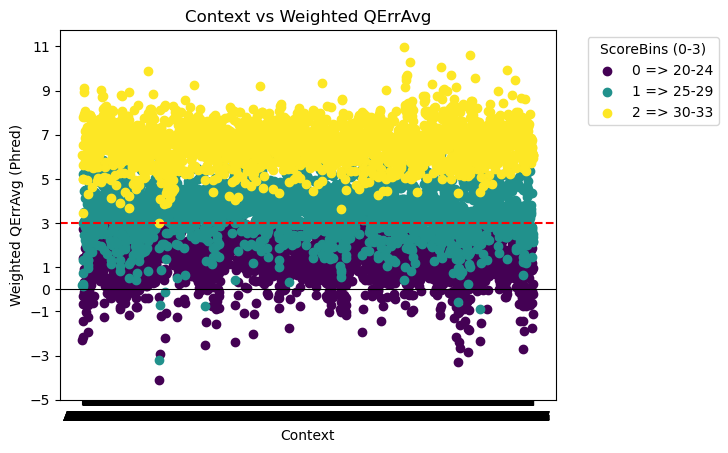

In [8]:
import numpy as np
import math

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from constants import RC_TAB2,RT2_STAT, CNTXT_RT2, RANGES
from user_args import UARGS
# draw a dot chart using matplotlib

def score_qntl_ranges(rt2_pre_stat_df):
    df =  rt2_pre_stat_df.groupby(RC_TAB2.RG_SCORE_BIN_COL)[RC_TAB2.QLTY_SCORE_COL].apply(lambda x: (min(x), max(x))).reset_index()
    return df.rename(columns={RC_TAB2.QLTY_SCORE_COL: RANGES.SCORE_BIN})

def jitter_list(lst, mean=0, std=0.1):
    jittered_list = np.array(lst) + np.random.normal(mean, std, len(lst))
    return jittered_list.tolist()


temp_stat_df = cntxt_rt2_stat_df
temp_stat_df = temp_stat_df.sort_values(by=[RC_TAB2.CNTXT_COV])
y_start = math.floor(temp_stat_df[RT2_STAT.BIN_AVG_QLTY_ERR_COL].min())
y_end = math.ceil(temp_stat_df[RT2_STAT.BIN_AVG_QLTY_ERR_COL].max())
jitter_factor = (y_end - y_start) /100

ranges = score_qntl_ranges(rt2_pre_stat_df)[RANGES.SCORE_BIN].unique()
# cmap = cm.get_cmap('viridis', len(cntxt_rt2_stat_df[RC_TAB2.RG_SCORE_BIN_COL].unique()))
cmap = cm.get_cmap('viridis', adict[UARGS.SCORE_BINS_COUNT])
# create the scatter plot
fig, ax = plt.subplots()
for i, group in temp_stat_df.groupby(RC_TAB2.RG_SCORE_BIN_COL):
    jittered_y = jitter_list(group[RT2_STAT.BIN_AVG_QLTY_ERR_COL], 0 , jitter_factor)
    # ax.scatter(group[CNTXT_RT2.CNTXT_COL], group[RT2_STAT.QLTY_ERR_W_AVG_COL], 
    ax.scatter(group[CNTXT_RT2.CNTXT_COL], jittered_y, 
            #    c=[cmap(i)], label=i)
        c=[cmap(i)], label=f'{i} => {ranges[i][0]}-{ranges[i][1]}')

ax.axhline(y=0, color='black', linewidth=0.8)
ax.axhline(y=cutoff, color='red', linestyle='--', linewidth=1.5)
ax.set_title('Context vs Weighted QErrAvg')
ax.set_xlabel('Context')
ax.set_ylabel('Weighted QErrAvg (Phred)')
ax.legend(title="ScoreBins (0-3)", bbox_to_anchor=(1.05, 1), loc='upper left')

# plt.xticks(range(cyc_rt2_stat_df[CYC_RT2.CYC_BIN_COL].min(), cyc_rt2_stat_df[CYC_RT2.CYC_BIN_COL].max()+1,2))

import numpy as np
# Y_TICKS_COUNT = 5
# yticks = np.arange(y_start, y_end, (y_end - y_start) / (Y_TICKS_COUNT))
YTICK_STEP = 2
yticks = np.arange(y_start, y_end, YTICK_STEP)
yticks = np.append(yticks, 0)

plt.yticks(yticks)
# display the chart
plt.show()


In [9]:
from br_stat_profiler import prepare_stat_df
from constants import RC_TAB2
mode = RC_TAB2.CYC_COV
cyc_rt2_stat_df = prepare_stat_df(rt2_pre_stat_df, mode, adict)
cyc_rt2_stat_df.head()

,ReadGroup,RG_ScoreBin,CycleBin,BinAvgQltyPval,BinAvgQltyScore,BinSumObs,BinSumObsErrs,BinAvgEmpQlty,BinAvgQltyErr,ID
0,HVWKMCCXY,0,-10,0.005962,22.246349,358720266,1339464.0,24.278249,2.031899,-10:0:CycleBin
1,HVWKMCCXY,1,-10,0.002173,26.629391,1027268183,768259.0,31.261762,4.632371,-10:1:CycleBin
2,HVWKMCCXY,2,-10,0.000796,30.989377,1950529650,399495.0,36.886412,5.897035,-10:2:CycleBin
3,HVWKMCCXY,0,-1,0.005616,22.505451,106234390,427305.0,23.955272,1.449820,-1:0:CycleBin
4,HVWKMCCXY,1,-1,0.001564,28.058181,1107740105,636007.0,32.409760,4.351579,-1:1:CycleBin


**QError Weighted Avg vs Read Cycle**

/tmp/ipykernel_3456094/1919762090.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', adict[UARGS.SCORE_BINS_COUNT])


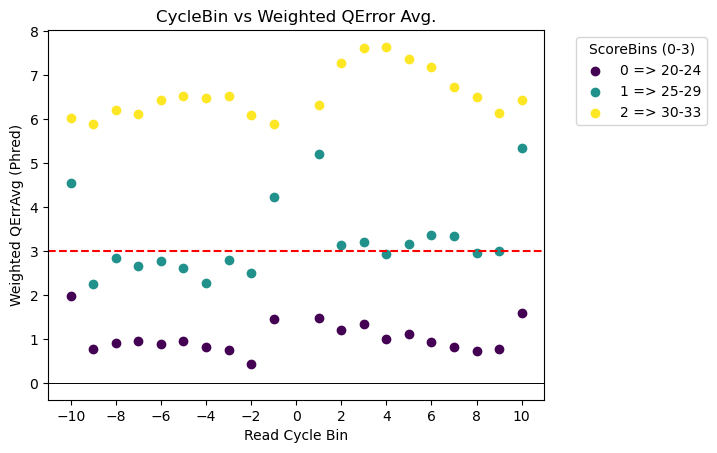

In [10]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from constants import RC_TAB2,RT2_STAT, CYC_RT2, RANGES
import matplotlib.colors as mcolors
from user_args import UARGS


def score_qntl_ranges(rt2_pre_stat_df):
    df =  rt2_pre_stat_df.groupby(RC_TAB2.RG_SCORE_BIN_COL)[RC_TAB2.QLTY_SCORE_COL].apply(lambda x: (min(x), max(x))).reset_index()
    return df.rename(columns={RC_TAB2.QLTY_SCORE_COL: RANGES.SCORE_BIN})

def jitter_list(lst, mean=0, std=0.1):
    jittered_list = np.array(lst) + np.random.normal(mean, std, len(lst))
    return jittered_list.tolist()

y_start = math.floor(cyc_rt2_stat_df[RT2_STAT.BIN_AVG_QLTY_ERR_COL].min())
y_end   = math.ceil(cyc_rt2_stat_df[RT2_STAT.BIN_AVG_QLTY_ERR_COL].max())
jitter_factor = (y_end - y_start) /100

ranges = score_qntl_ranges(rt2_pre_stat_df)[RANGES.SCORE_BIN].unique()
# cmap = cm.get_cmap('viridis', len(cyc_rt2_stat_df[RC_TAB2.RG_SCORE_BIN_COL].unique())+2)
cmap = cm.get_cmap('viridis', adict[UARGS.SCORE_BINS_COUNT])

fig, ax = plt.subplots()
for i, group in cyc_rt2_stat_df.groupby(RC_TAB2.RG_SCORE_BIN_COL):
    # print(i, cmap(i))
    jittered_y = jitter_list(group[RT2_STAT.BIN_AVG_QLTY_ERR_COL], 0 , jitter_factor)
    ax.scatter(group[CYC_RT2.CYC_BIN_COL], jittered_y,
        c=[cmap(i)], label=f'{i} => {ranges[i][0]}-{ranges[i][1]}')

ax.axhline(y=0, color='black', linewidth=.7)
ax.axhline(y=cutoff, color='red', linestyle='--', linewidth=1.5)
ax.set_title('CycleBin vs Weighted QError Avg.')
ax.set_xlabel('Read Cycle Bin')
ax.set_ylabel('Weighted QErrAvg (Phred)')
ax.legend(title="ScoreBins (0-3)", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(range(cyc_rt2_stat_df[CYC_RT2.CYC_BIN_COL].min(), cyc_rt2_stat_df[CYC_RT2.CYC_BIN_COL].max()+1,2))
# plt.yticks(range(round(cyc_rt2_stat_df[RT2_STAT.QLTY_ERR_AVG_COL].min()), round(cyc_rt2_stat_df[RT2_STAT.QLTY_ERR_AVG_COL].max())+1))
# display the chart
plt.show()
